In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv1= pd.read_csv('trainUSnew.csv')
csv1.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [3]:
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  545 non-null    object 
 1   Month                 545 non-null    object 
 2   Year                  545 non-null    int64  
 3   Decibel_Level         545 non-null    int64  
 4   Traffic_Density       545 non-null    object 
 5   Green_Space_Area      545 non-null    int64  
 6   Air_Quality_Index     545 non-null    int64  
 7   Happiness_Score       545 non-null    float64
 8   Cost_of_Living_Index  545 non-null    int64  
 9   Healthcare_Index      545 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 42.7+ KB


In [4]:
csv2= pd.read_csv('test new.csv')
csv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  51 non-null     object 
 1   Month                 51 non-null     object 
 2   Year                  51 non-null     int64  
 3   Decibel_Level         51 non-null     int64  
 4   Traffic_Density       51 non-null     object 
 5   Green_Space_Area      51 non-null     int64  
 6   Air_Quality_Index     51 non-null     int64  
 7   Happiness_Score       51 non-null     float64
 8   Cost_of_Living_Index  51 non-null     int64  
 9   Healthcare_Index      51 non-null     int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ KB


# Concatenamos los 2 archivos .csv:

In [5]:
data= pd.concat([csv1,csv2], axis= 0, join='outer', ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  596 non-null    object 
 1   Month                 596 non-null    object 
 2   Year                  596 non-null    int64  
 3   Decibel_Level         596 non-null    int64  
 4   Traffic_Density       596 non-null    object 
 5   Green_Space_Area      596 non-null    int64  
 6   Air_Quality_Index     596 non-null    int64  
 7   Happiness_Score       596 non-null    float64
 8   Cost_of_Living_Index  596 non-null    int64  
 9   Healthcare_Index      596 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 46.7+ KB


# Creamos el DataFrame con las columnas que queremos_

In [6]:
data.columns

Index(['City', 'Month', 'Year', 'Decibel_Level', 'Traffic_Density',
       'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score',
       'Cost_of_Living_Index', 'Healthcare_Index'],
      dtype='object')

In [7]:
df= data[['City', 'Decibel_Level', 'Traffic_Density', 'Green_Space_Area', 'Air_Quality_Index', 'Happiness_Score', 'Cost_of_Living_Index', 'Healthcare_Index']]

In [8]:
df= df.rename(columns={'City':'Ciudad','Decibel_Level':'Nivel_Decibelios','Traffic_Density':'Densidad_Tráfico','Green_Space_Area':'Área_Espacio_Verde','Air_Quality_Index':'Índice_Calidad_Aire','Happiness_Score':'Nota_Felicidad','Cost_of_Living_Index':'Índice_Coste_Vida','Healthcare_Index':'Índice_Sanidad'})
df.head()

,Ciudad,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
0,New York,70,High,35,40,6.5,100,80
1,Los Angeles,65,Medium,40,50,6.8,90,75
2,Chicago,60,Medium,30,55,7.0,85,70
3,London,55,High,50,60,7.2,110,85
4,Paris,60,High,45,65,6.9,95,80


# Quitamos los datos repetidos y ponemos las ciudades de índice:

In [9]:
df['Ciudad'].value_counts()

Ciudad
Greymouth     13
Hokitika      12
Queenstown    10
Murchison     10
Reefton       10
              ..
Dargaville     1
Kaitaia        1
Kaikohe        1
Kerikeri       1
Zagreb         1
Name: count, Length: 252, dtype: int64

In [10]:
df= df.drop_duplicates('Ciudad', keep= 'first')
df['Ciudad'].value_counts()

Ciudad
New York          1
Hanmer Springs    1
Langs Beach       1
Whakatane         1
Hastings          1
                 ..
Putaruru          1
Taupo             1
Tokoroa           1
Te Kuiti          1
Zagreb            1
Name: count, Length: 252, dtype: int64

In [11]:
df= df.set_index('Ciudad')
df.head(1)

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
Ciudad,,,,,,,
New York,70,High,35,40,6.5,100,80


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, New York to Zagreb
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nivel_Decibelios     252 non-null    int64  
 1   Densidad_Tráfico     252 non-null    object 
 2   Área_Espacio_Verde   252 non-null    int64  
 3   Índice_Calidad_Aire  252 non-null    int64  
 4   Nota_Felicidad       252 non-null    float64
 5   Índice_Coste_Vida    252 non-null    int64  
 6   Índice_Sanidad       252 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 15.8+ KB


# Cambiamos Densidad_Tráfico a int:

In [14]:
df.Densidad_Tráfico.value_counts()

Densidad_Tráfico
Low          141
Medium        56
High          36
Very High     19
Name: count, dtype: int64

In [15]:
df['Densidad_Tráfico'].replace({'Low':10, 'Medium':20, 'High':30, 'Very High':40}, inplace= True)
df.head()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
Ciudad,,,,,,,
New York,70,30,35,40,6.5,100,80
Los Angeles,65,20,40,50,6.8,90,75
Chicago,60,20,30,55,7.0,85,70
London,55,30,50,60,7.2,110,85
Paris,60,30,45,65,6.9,95,80


In [16]:
df['Densidad_Tráfico']= df['Densidad_Tráfico'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, New York to Zagreb
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nivel_Decibelios     252 non-null    int64  
 1   Densidad_Tráfico     252 non-null    int64  
 2   Área_Espacio_Verde   252 non-null    int64  
 3   Índice_Calidad_Aire  252 non-null    int64  
 4   Nota_Felicidad       252 non-null    float64
 5   Índice_Coste_Vida    252 non-null    int64  
 6   Índice_Sanidad       252 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 15.8+ KB


# Exploramos el DataFrame:

In [17]:
df.describe()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,59.444444,17.341270,337.420635,52.301587,-3.870635,45.873016,88.261905
std,8.739757,9.679866,337.077748,48.780551,15.474825,31.421054,14.477447
min,50.000000,10.000000,5.000000,5.000000,-55.700000,20.000000,35.000000
25%,55.000000,10.000000,45.000000,25.000000,-13.775000,20.000000,85.000000
50%,55.000000,10.000000,217.500000,35.000000,4.100000,25.000000,95.000000
75%,60.000000,20.000000,606.250000,55.000000,7.100000,70.000000,97.000000
max,90.000000,40.000000,1305.000000,240.000000,8.600000,130.000000,104.000000


# Quitamos los valores desproporcionados:

In [18]:
df= df[df['Área_Espacio_Verde'] < 175]

In [19]:
df= df[df['Índice_Calidad_Aire'] < 80]

In [20]:
df= df[df['Nota_Felicidad'] > -20]

In [21]:
df= df[df['Índice_Coste_Vida'] < 100]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, Los Angeles to Zagreb
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nivel_Decibelios     49 non-null     int64  
 1   Densidad_Tráfico     49 non-null     int64  
 2   Área_Espacio_Verde   49 non-null     int64  
 3   Índice_Calidad_Aire  49 non-null     int64  
 4   Nota_Felicidad       49 non-null     float64
 5   Índice_Coste_Vida    49 non-null     int64  
 6   Índice_Sanidad       49 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 3.1+ KB


# Aumentamos las notas de Felicidad para graficarlos mejor:

In [23]:
df['Nota_Felicidad']= df['Nota_Felicidad'] * 10
df.head()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
Ciudad,,,,,,,
Los Angeles,65,20,40,50,68.0,90,75
Chicago,60,20,30,55,70.0,85,70
Paris,60,30,45,65,69.0,95,80
Berlin,50,10,55,35,75.0,80,85
Rio de Janeiro,65,20,50,55,65.0,80,75


In [24]:
df.describe()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,57.755102,15.918367,79.081633,41.326531,76.510204,69.897959,88.877551
std,4.793792,7.046976,40.526142,18.646255,6.693039,23.172582,8.582037
min,50.000000,10.000000,20.000000,5.000000,61.000000,20.000000,70.000000
25%,55.000000,10.000000,45.000000,30.000000,71.000000,60.000000,82.000000
50%,55.000000,10.000000,70.000000,35.000000,78.000000,80.000000,93.000000
75%,60.000000,20.000000,105.000000,55.000000,82.000000,90.000000,96.000000
max,70.000000,30.000000,170.000000,75.000000,86.000000,95.000000,98.000000


# Vemos y graficamos las ciudades por el ruido:

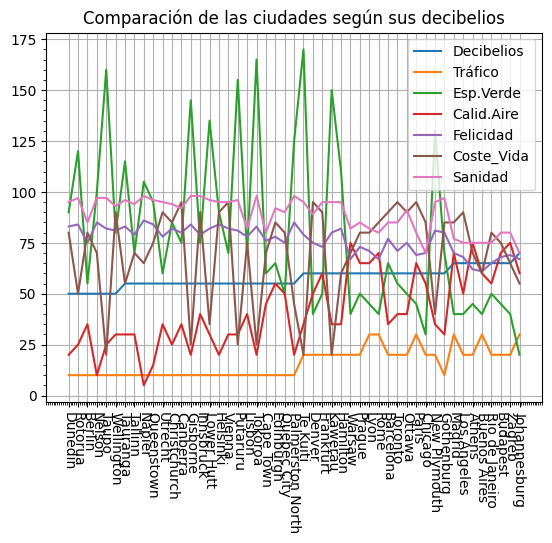

In [59]:
plt.title('Comparación de las ciudades según sus decibelios')
plt.plot(df.sort_values(by='Nivel_Decibelios'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [26]:
df.describe()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,57.755102,15.918367,79.081633,41.326531,76.510204,69.897959,88.877551
std,4.793792,7.046976,40.526142,18.646255,6.693039,23.172582,8.582037
min,50.000000,10.000000,20.000000,5.000000,61.000000,20.000000,70.000000
25%,55.000000,10.000000,45.000000,30.000000,71.000000,60.000000,82.000000
50%,55.000000,10.000000,70.000000,35.000000,78.000000,80.000000,93.000000
75%,60.000000,20.000000,105.000000,55.000000,82.000000,90.000000,96.000000
max,70.000000,30.000000,170.000000,75.000000,86.000000,95.000000,98.000000


In [27]:
## Por el nivel de decibelios podemos deducir que el ruido va relacionado proporcionalmente con el 
## nivel del tráfico e inversamente proporcional al área de espacio verde, y el mejor ejemplo es Johannesburg,
## siendo la ciudad más ruidosa con el mayor índice de tráfico y el menor área de espacio verde.  
## Como datos curiosos tenemos: 
## - Por ejemplo la ciudad de Quebec que aún teniendo un área de espacio verde bajo,
## mantiene un nivel de tráfico y ruido también bajo.   
## - Y en el lado opuesto está Gothenburg que aún teniendo un nivel mínimo de tráfico y un área de espacio
## verde justo en la media, tiene un nivel de ruido por encima de la media.

# Vemos las ciudades según el tráfico:

In [28]:
df.describe()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,57.755102,15.918367,79.081633,41.326531,76.510204,69.897959,88.877551
std,4.793792,7.046976,40.526142,18.646255,6.693039,23.172582,8.582037
min,50.000000,10.000000,20.000000,5.000000,61.000000,20.000000,70.000000
25%,55.000000,10.000000,45.000000,30.000000,71.000000,60.000000,82.000000
50%,55.000000,10.000000,70.000000,35.000000,78.000000,80.000000,93.000000
75%,60.000000,20.000000,105.000000,55.000000,82.000000,90.000000,96.000000
max,70.000000,30.000000,170.000000,75.000000,86.000000,95.000000,98.000000


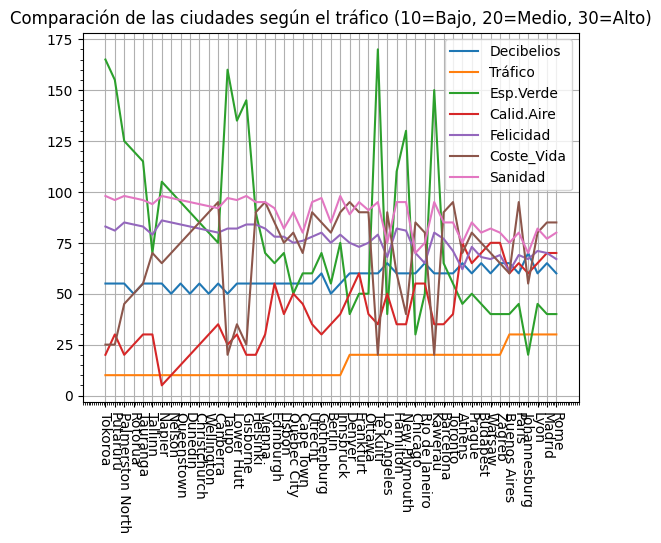

In [60]:
plt.title('Comparación de las ciudades según el tráfico (10=Bajo, 20=Medio, 30=Alto)')
plt.plot(df.sort_values(by='Densidad_Tráfico'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [30]:
## Viendo el gráfico según el tráfico, podemos ver cómo destacan Te Kuiti, Kawerau,
## New Plymouth y Hamilton por tener un nivel de tráfico medio aún teniendo grandes
## áreas de Espacio Verde.

# Vemos las ciudades según su área de Espacio Verde:

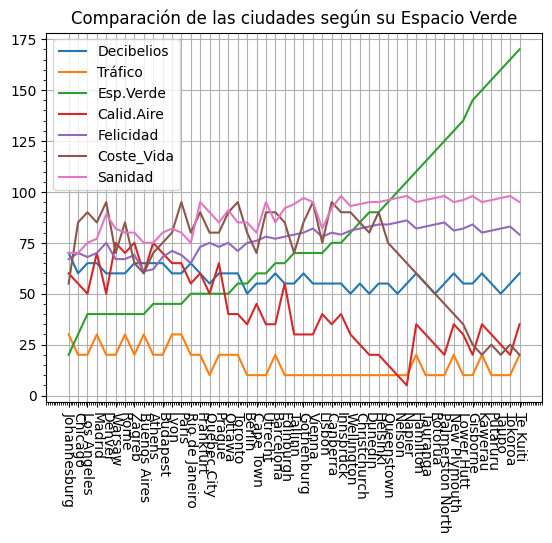

In [61]:
plt.title('Comparación de las ciudades según su Espacio Verde')
plt.plot(df.sort_values(by='Área_Espacio_Verde'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [32]:
## Viendo la gráfica del área de Espacio Verde podemos observar que mientras más
## espacio Verde, menor índice de calidad del aire y mayor Sanidad.
## Curiosamente también aumenta la Felicidad.

# Vemos las ciudades según la Calidad del Aire:

In [33]:
df.describe()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,57.755102,15.918367,79.081633,41.326531,76.510204,69.897959,88.877551
std,4.793792,7.046976,40.526142,18.646255,6.693039,23.172582,8.582037
min,50.000000,10.000000,20.000000,5.000000,61.000000,20.000000,70.000000
25%,55.000000,10.000000,45.000000,30.000000,71.000000,60.000000,82.000000
50%,55.000000,10.000000,70.000000,35.000000,78.000000,80.000000,93.000000
75%,60.000000,20.000000,105.000000,55.000000,82.000000,90.000000,96.000000
max,70.000000,30.000000,170.000000,75.000000,86.000000,95.000000,98.000000


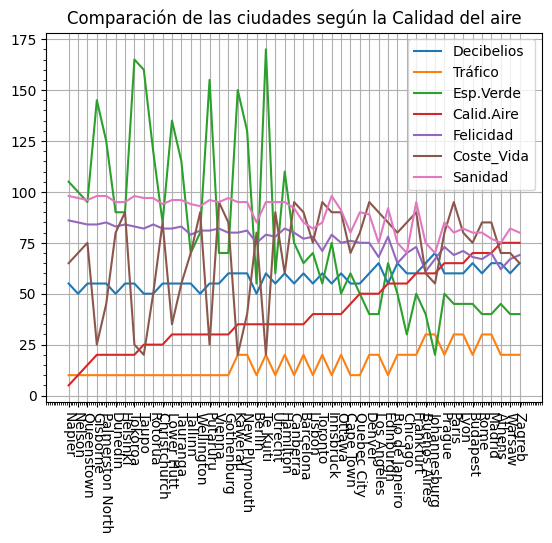

In [63]:
plt.title('Comparación de las ciudades según la Calidad del aire')
plt.plot(df.sort_values(by='Índice_Calidad_Aire'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [35]:
## Según la Calidad del Aire, a mayor nivel, mayor Coste de Vida, esto es débido
## a que son ciudades muy pobladas. Como excepción tenemos a Johannesburg,
## a Buenos Aires, a Zagreb, Warsaw y Athens que aún siendo muy pobladas, el
## Coste de Vida se mantiene a la baja seguramente por la situación económica 
## de sus países.

# Vemos las ciudades según su Felicidad:

In [36]:
df.describe()

,Nivel_Decibelios,Densidad_Tráfico,Área_Espacio_Verde,Índice_Calidad_Aire,Nota_Felicidad,Índice_Coste_Vida,Índice_Sanidad
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,57.755102,15.918367,79.081633,41.326531,76.510204,69.897959,88.877551
std,4.793792,7.046976,40.526142,18.646255,6.693039,23.172582,8.582037
min,50.000000,10.000000,20.000000,5.000000,61.000000,20.000000,70.000000
25%,55.000000,10.000000,45.000000,30.000000,71.000000,60.000000,82.000000
50%,55.000000,10.000000,70.000000,35.000000,78.000000,80.000000,93.000000
75%,60.000000,20.000000,105.000000,55.000000,82.000000,90.000000,96.000000
max,70.000000,30.000000,170.000000,75.000000,86.000000,95.000000,98.000000


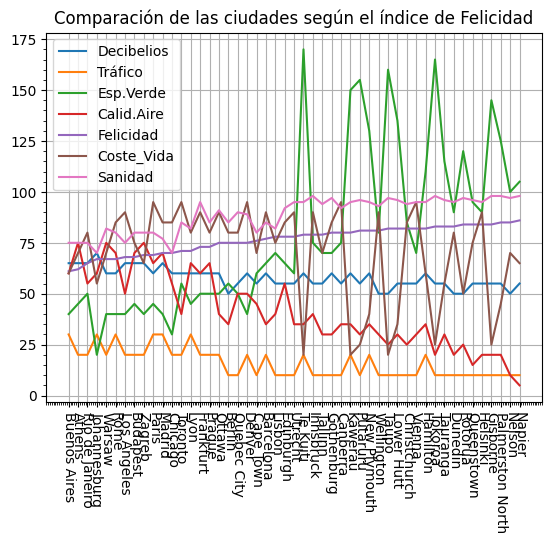

In [64]:
plt.title('Comparación de las ciudades según el índice de Felicidad')
plt.plot(df.sort_values(by='Nota_Felicidad'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [38]:
## La Felicidad se puede resumir diciendo que son más felices a mayor Sanidad,
## mayor área de espacios Verdes, menos tráfico, menor índice de Calidad del
## Aire, menos ruido y menos Coste de Vida exceptuando algunas ciudades.S

# Vemos las ciudades según su Coste de Vida:

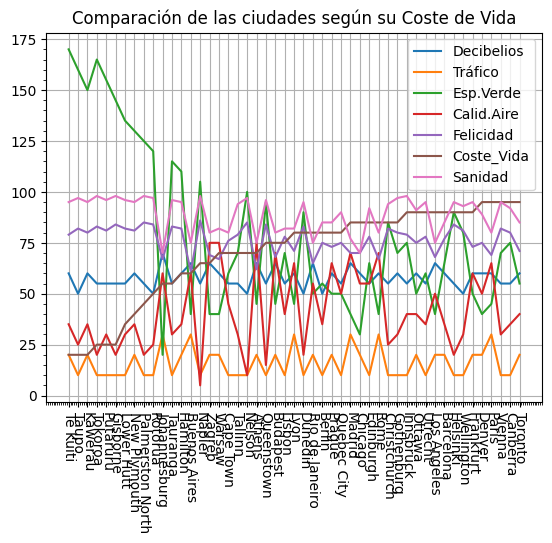

In [65]:
plt.title('Comparación de las ciudades según su Coste de Vida')
plt.plot(df.sort_values(by='Índice_Coste_Vida'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [40]:
## Ya se ha dicho todo lo importante sobre el Coste de Vida.

# Ver las ciudades según su Sanidad:

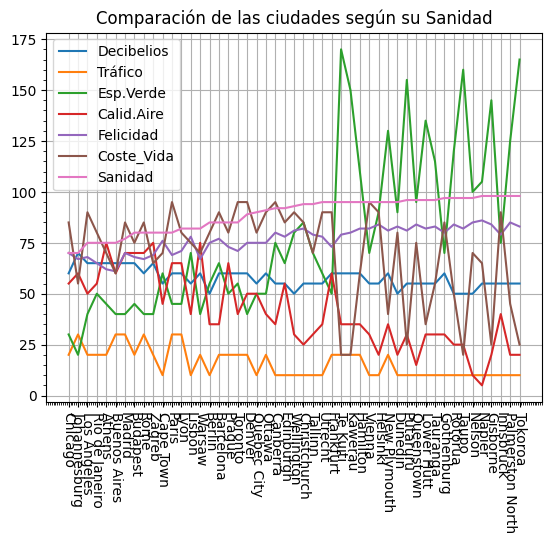

In [66]:
plt.title('Comparación de las ciudades según su Sanidad')
plt.plot(df.sort_values(by= 'Índice_Sanidad'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [42]:
## Respecto a la Sanidad podemos decir que tenemos mayor índice de Sanidad cuando hay
## mayor índice de felicidad y de área de Espacios Verdes. Y con menor indice de ruido, 
## de tráfico, de calidad del aire y de coste de vida relativamente.

# Hacer un Timestamp con las fechas de la ciudad de Greymouth:

In [43]:
data['City'].value_counts()

City
Greymouth     13
Hokitika      12
Queenstown    10
Murchison     10
Reefton       10
              ..
Dargaville     1
Kaitaia        1
Kaikohe        1
Kerikeri       1
Zagreb         1
Name: count, Length: 252, dtype: int64

In [44]:
df2= data[data['City'] == 'Greymouth']
df2

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
187,Greymouth,August,2025,50,Low,640,25,-15.8,20,97
212,Greymouth,October,2025,55,Low,765,20,-23.3,25,98
228,Greymouth,December,2025,55,Low,845,20,-28.1,25,98
267,Greymouth,April,2026,50,Low,1040,25,-39.8,20,97
284,Greymouth,June,2026,55,Low,1125,20,-44.9,25,98
294,Greymouth,July,2026,55,Low,1175,30,-47.9,25,96
322,Greymouth,November,2026,55,Low,1315,30,-56.3,25,96
343,Greymouth,January,2027,50,Low,1420,25,-62.6,20,97
383,Greymouth,June,2027,50,Low,1620,25,-74.6,20,97
423,Greymouth,February,2028,50,Low,1820,25,-86.6,20,97


In [45]:
df2['Month'].replace({'January':1, 'February': 2, 'April': 4, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}, inplace=True)
df2.head(13)

C:\Users\user\AppData\Local\Temp\ipykernel_504\335072780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'].replace({'January':1, 'February': 2, 'April': 4, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}, inplace=True)


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
187,Greymouth,8,2025,50,Low,640,25,-15.8,20,97
212,Greymouth,10,2025,55,Low,765,20,-23.3,25,98
228,Greymouth,12,2025,55,Low,845,20,-28.1,25,98
267,Greymouth,4,2026,50,Low,1040,25,-39.8,20,97
284,Greymouth,6,2026,55,Low,1125,20,-44.9,25,98
294,Greymouth,7,2026,55,Low,1175,30,-47.9,25,96
322,Greymouth,11,2026,55,Low,1315,30,-56.3,25,96
343,Greymouth,1,2027,50,Low,1420,25,-62.6,20,97
383,Greymouth,6,2027,50,Low,1620,25,-74.6,20,97
423,Greymouth,2,2028,50,Low,1820,25,-86.6,20,97


In [46]:
df2['Month']= df2['Month'].astype('str')

C:\Users\user\AppData\Local\Temp\ipykernel_504\1931663388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month']= df2['Month'].astype('str')


In [47]:
df2['Year']= df2['Year'].astype('str')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 187 to 543
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  13 non-null     object 
 1   Month                 13 non-null     object 
 2   Year                  13 non-null     object 
 3   Decibel_Level         13 non-null     int64  
 4   Traffic_Density       13 non-null     object 
 5   Green_Space_Area      13 non-null     int64  
 6   Air_Quality_Index     13 non-null     int64  
 7   Happiness_Score       13 non-null     float64
 8   Cost_of_Living_Index  13 non-null     int64  
 9   Healthcare_Index      13 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.1+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_504\2158008343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year']= df2['Year'].astype('str')


In [48]:
df2['Fecha']= df2['Month']+'/'+ df2['Year']
df2

C:\Users\user\AppData\Local\Temp\ipykernel_504\3544235969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Fecha']= df2['Month']+'/'+ df2['Year']


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Fecha
187,Greymouth,8,2025,50,Low,640,25,-15.8,20,97,8/2025
212,Greymouth,10,2025,55,Low,765,20,-23.3,25,98,10/2025
228,Greymouth,12,2025,55,Low,845,20,-28.1,25,98,12/2025
267,Greymouth,4,2026,50,Low,1040,25,-39.8,20,97,4/2026
284,Greymouth,6,2026,55,Low,1125,20,-44.9,25,98,6/2026
294,Greymouth,7,2026,55,Low,1175,30,-47.9,25,96,7/2026
322,Greymouth,11,2026,55,Low,1315,30,-56.3,25,96,11/2026
343,Greymouth,1,2027,50,Low,1420,25,-62.6,20,97,1/2027
383,Greymouth,6,2027,50,Low,1620,25,-74.6,20,97,6/2027
423,Greymouth,2,2028,50,Low,1820,25,-86.6,20,97,2/2028


In [49]:
df2.pop('City')
df2.head(0)

,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Fecha


In [50]:
df2.pop('Month')
df2.head(0)

,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Fecha


In [51]:
df2.pop('Year')
df2.head(0)

,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Fecha


In [52]:
df2= df2.set_index('Fecha')
df2.head()

,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
Fecha,,,,,,,
8/2025,50,Low,640,25,-15.8,20,97
10/2025,55,Low,765,20,-23.3,25,98
12/2025,55,Low,845,20,-28.1,25,98
4/2026,50,Low,1040,25,-39.8,20,97
6/2026,55,Low,1125,20,-44.9,25,98


In [53]:
df2.index= pd.to_datetime(df2.index)
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_504\1993399224.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2.index= pd.to_datetime(df2.index)


,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
Fecha,,,,,,,
2025-08-01,50,Low,640,25,-15.8,20,97
2025-10-01,55,Low,765,20,-23.3,25,98
2025-12-01,55,Low,845,20,-28.1,25,98
2026-04-01,50,Low,1040,25,-39.8,20,97
2026-06-01,55,Low,1125,20,-44.9,25,98


In [54]:
df2['Traffic_Density'].replace({'Low': 10}, inplace=True)

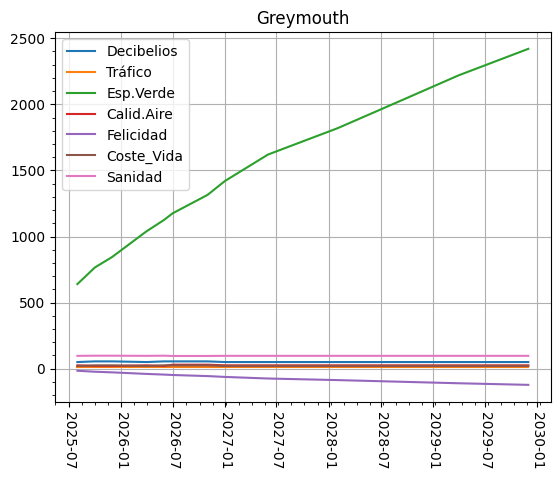

In [55]:
plt.title('Greymouth')
plt.plot(df2.sort_values(by= 'Green_Space_Area'), label= ['Decibelios','Tráfico','Esp.Verde','Calid.Aire','Felicidad','Coste_Vida','Sanidad'])
plt.legend()
plt.xticks(rotation= 270)
plt.grid()
plt.minorticks_on()

In [56]:
## En este Timestand podemos observar que el área de Espacio Verde ha ido aumentando 
## notablemente, entre 200 y 300 puntos cada medio año. Y vemos también que 
## el nivel de Felicidad ha ido disminuyendo lentamente, llegando a más de 100 puntos 
## por debajo en cuestión de 4 años y medio. 